<a href="https://colab.research.google.com/github/VaeriaBautista/Simulaci-n-I/blob/main/Chi_Cuadrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prueba Chi Cuadrada para Distribución Uniforme U(0,1)
Tamaño de muestra (n): 1000
Número de clases (k): 10
Amplitud de clase: 0.1000
Grados de libertad: 9
Nivel de confianza: 0.95

Estadístico chi cuadrada calculado: 9.4000
Valor crítico: 16.9190
P-valor: 0.4012

Decisión: No se rechaza H0

Frecuencias por clase:
  Clase 1 [0.00, 0.10): 108 (Esperado: 100.0)
  Clase 2 [0.10, 0.20): 117 (Esperado: 100.0)
  Clase 3 [0.20, 0.30): 94 (Esperado: 100.0)
  Clase 4 [0.30, 0.40): 102 (Esperado: 100.0)
  Clase 5 [0.40, 0.50): 82 (Esperado: 100.0)
  Clase 6 [0.50, 0.60): 110 (Esperado: 100.0)
  Clase 7 [0.60, 0.70): 99 (Esperado: 100.0)
  Clase 8 [0.70, 0.80): 89 (Esperado: 100.0)
  Clase 9 [0.80, 0.90): 99 (Esperado: 100.0)
  Clase 10 [0.90, 1.00): 100 (Esperado: 100.0)


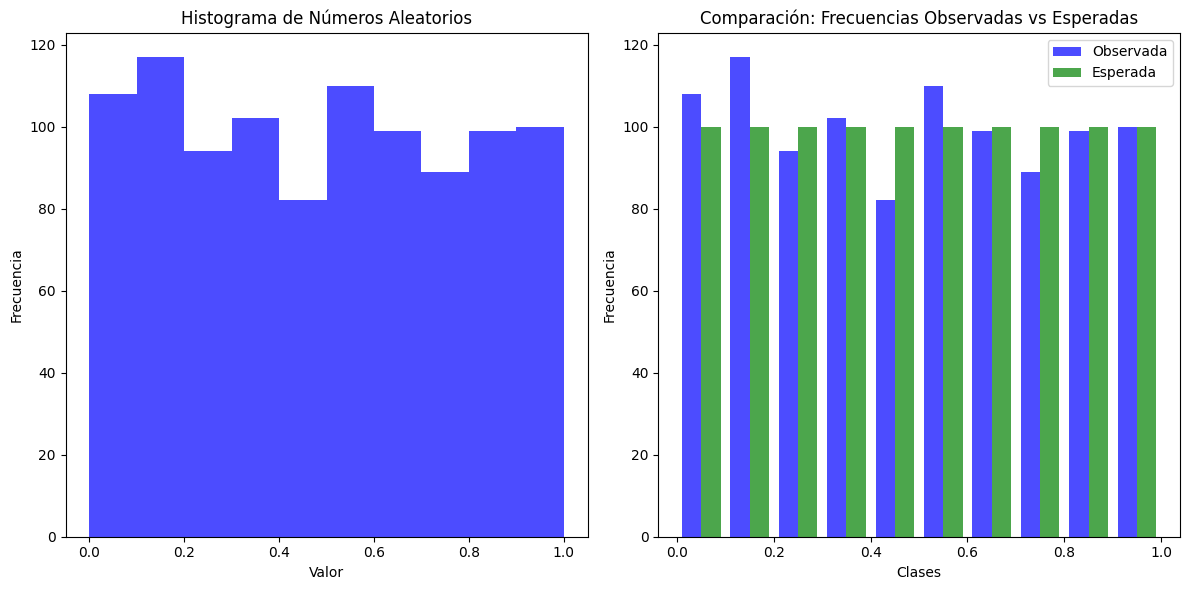

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def prueba_chi_cuadrada(numeros_aleatorios, num_clases, nivel_confianza=0.95):
    """
    Realiza la prueba de chi cuadrada para verificar si los números aleatorios
    siguen una distribución uniforme U(0,1).

    Args:
        numeros_aleatorios (list/array): Lista de números aleatorios a probar
        num_clases (int): Número de clases para agrupar los datos
        nivel_confianza (float): Nivel de confianza para la prueba (default: 0.95)

    Returns:
        dict: Diccionario con los resultados de la prueba
    """
    n = len(numeros_aleatorios)
    alpha = 1 - nivel_confianza

    # 1. Agrupar los números en k clases de igual amplitud
    amplitud = 1.0 / num_clases
    limites_clases = np.linspace(0, 1, num_clases + 1)

    # 2. Hallar frecuencia de cada clase
    frecuencias, _ = np.histogram(numeros_aleatorios, bins=limites_clases)

    # Frecuencia esperada para cada clase (distribución uniforme)
    frecuencia_esperada = n * amplitud

    # 3. Calcular el estadístico chi cuadrada
    chi_cuadrada = np.sum((frecuencias - frecuencia_esperada)**2 / frecuencia_esperada)

    # 4. Determinar el valor crítico
    grados_libertad = num_clases - 1
    valor_critico = stats.chi2.ppf(nivel_confianza, grados_libertad)

    # Decisión
    decision = "No se rechaza H0" if chi_cuadrada <= valor_critico else "Se rechaza H0"
    p_valor = 1 - stats.chi2.cdf(chi_cuadrada, grados_libertad)

    # Crear gráfica para visualización
    plt.figure(figsize=(12, 6))

    # Histograma de frecuencias observadas
    plt.subplot(1, 2, 1)
    plt.hist(numeros_aleatorios, bins=limites_clases, alpha=0.7, color='blue')
    plt.title('Histograma de Números Aleatorios')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

    # Gráfica de comparación de frecuencias
    plt.subplot(1, 2, 2)
    anchos_barras = (limites_clases[1:] - limites_clases[:-1]) * 0.4
    centros_clases = (limites_clases[1:] + limites_clases[:-1]) / 2

    plt.bar(centros_clases - anchos_barras/2, frecuencias, width=anchos_barras,
            color='blue', alpha=0.7, label='Observada')
    plt.bar(centros_clases + anchos_barras/2, [frecuencia_esperada] * num_clases, width=anchos_barras,
            color='green', alpha=0.7, label='Esperada')
    plt.title('Comparación: Frecuencias Observadas vs Esperadas')
    plt.xlabel('Clases')
    plt.ylabel('Frecuencia')
    plt.legend()

    plt.tight_layout()

    resultados = {
        "n": n,
        "num_clases": num_clases,
        "amplitud_clase": amplitud,
        "limites_clases": limites_clases,
        "frecuencias": frecuencias,
        "frecuencia_esperada": frecuencia_esperada,
        "chi_cuadrada": chi_cuadrada,
        "grados_libertad": grados_libertad,
        "nivel_confianza": nivel_confianza,
        "valor_critico": valor_critico,
        "p_valor": p_valor,
        "decision": decision
    }

    return resultados, plt.gcf()

# Ejemplo de uso:
def ejemplo_uso():
    # Generar números aleatorios
    np.random.seed(42)  # Para reproducibilidad
    n = 1000  # Tamaño de la muestra
    numeros_aleatorios = np.random.random(n)  # Genera n números U(0,1)

    # Parámetros de la prueba
    # nivel_confianza = \alpha
    num_clases = 10
    nivel_confianza  = 0.95

    # Realizar prueba
    resultados, fig = prueba_chi_cuadrada(numeros_aleatorios, num_clases, nivel_confianza)

    # Imprimir resultados
    print(f"Prueba Chi Cuadrada para Distribución Uniforme U(0,1)")
    print(f"Tamaño de muestra (n): {resultados['n']}")
    print(f"Número de clases (k): {resultados['num_clases']}")
    print(f"Amplitud de clase: {resultados['amplitud_clase']:.4f}")
    print(f"Grados de libertad: {resultados['grados_libertad']}")
    print(f"Nivel de confianza: {resultados['nivel_confianza']:.2f}")
    print(f"\nEstadístico chi cuadrada calculado: {resultados['chi_cuadrada']:.4f}")
    print(f"Valor crítico: {resultados['valor_critico']:.4f}")
    print(f"P-valor: {resultados['p_valor']:.4f}")
    print(f"\nDecisión: {resultados['decision']}")
    print("\nFrecuencias por clase:")
    for i, (lim_inf, lim_sup, frec) in enumerate(zip(resultados['limites_clases'][:-1],
                                                     resultados['limites_clases'][1:],
                                                     resultados['frecuencias'])):
        print(f"  Clase {i+1} [{lim_inf:.2f}, {lim_sup:.2f}): {frec} (Esperado: {resultados['frecuencia_esperada']:.1f})")

    # Mostrar gráfica
    plt.show()

    return resultados

if __name__ == "__main__":
    ejemplo_uso()